In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to the data
path = "Datasets/goodreads_interactions.csv"

# Define the chunksize for reading the data
chunksize = 10 ** 6

In [2]:
# Initialize an empty DataFrame for aggregated results
aggregated_counts = pd.DataFrame()

# Process the file in chunks
with pd.read_csv(path, chunksize=chunksize) as reader:
    for chunk in reader:
        # Perform the groupby and count operation on the chunk
        chunk_counts = chunk.groupby("user_id").count()

        # Combine the chunk results with the aggregated DataFrame
        # If the DataFrame is empty, assign the chunk_counts directly
        if aggregated_counts.empty:
            aggregated_counts = chunk_counts
        else:
            # Aggregate with the existing data
            aggregated_counts = aggregated_counts.add(chunk_counts, fill_value=0)

                                  book_id  date_added  read_at  started_at
user_id                                                                   
00000377eea48021d3002730d56aca9a     39.0        39.0     39.0        39.0
000011f876e80dbdf9ca166005fa1d3e      1.0         1.0      1.0         1.0
00004584d524ec468619e81b176cc991      2.0         2.0      2.0         2.0
000079c580bbe45e1500acabe551b276      6.0         6.0      6.0         6.0
00009ab2ed8cbfceda5a59da40966321      9.0         9.0      9.0         9.0
...                                   ...         ...      ...         ...
ffff943e2e329be4f410d874aaa3ae7f      2.0         2.0      2.0         2.0
ffffbb062a8b208c9c1031b529c08f7a     91.0        91.0     91.0        91.0
ffffd81a724c0fa70ac37cd347c1c0f1      6.0         6.0      6.0         6.0
ffffe38c3a89ad5122e17e4cb9997fe4      7.0         7.0      7.0         7.0
fffff8a718843c0e11dfd93fb41c1297     31.0        31.0     31.0        31.0

[610571 rows x 4 columns

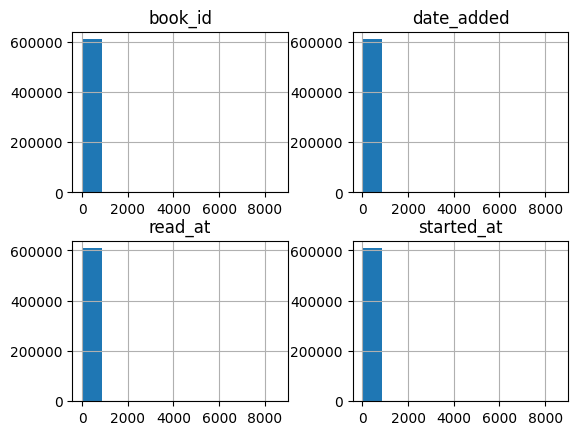

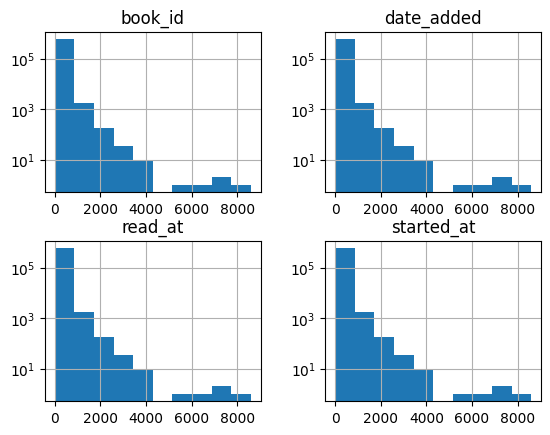

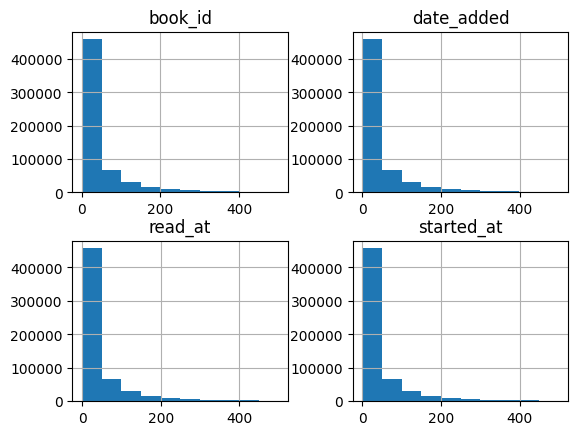

In [3]:
# After processing all chunks, aggregated_counts will have the total count per user_id
print(aggregated_counts)

# Plot the histogram of aggregated_counts
aggregated_counts.hist()
plt.show()

# Plot a logarithmic histogram of aggregated_counts
aggregated_counts.hist(log=True)
plt.show()

# Plot linear histogram with maximum of 1000 books per user
less_than_1000 = aggregated_counts[aggregated_counts["book_id"] < 500]
less_than_1000.hist()
plt.show()

In [4]:
# Initialize a list to collect the DataFrame chunks
chunks_list = []

# Process the file in chunks
with pd.read_csv(path, chunksize=chunksize) as reader:
    for chunk in reader:
        # Convert date columns to datetime
        chunk['date_added'] = pd.to_datetime(chunk['date_added'])
        chunk['started_at'] = pd.to_datetime(chunk['started_at'])
        chunk['read_at'] = pd.to_datetime(chunk['read_at'])

        # Calculate 'time to start' and 'time to read'
        chunk['time_to_start'] = chunk['started_at'] - chunk['date_added']
        chunk['time_to_read'] = chunk['read_at'] - chunk['started_at']

        # Keep only necessary columns
        chunk = chunk[['user_id', 'time_to_start', 'time_to_read']]

        # Append the processed chunk to the list
        chunks_list.append(chunk)

# Concatenate all the chunks
concatenated_df = pd.concat(chunks_list)

# Group by 'user_id' and calculate the mean 'time to start' and 'time to read'
aggregated_data = concatenated_df.groupby('user_id').agg({'time_to_start': 'mean', 'time_to_read': 'mean'})

# After processing all chunks, aggregated_data will have the mean 'time to start' and 'time to read' per user_id
print(aggregated_data)

                                                 time_to_start  \
user_id                                                          
00000377eea48021d3002730d56aca9a -313 days +00:11:53.230769232   
000011f876e80dbdf9ca166005fa1d3e              98 days 17:20:48   
00004584d524ec468619e81b176cc991       19 days 08:12:28.500000   
000079c580bbe45e1500acabe551b276              11 days 00:54:31   
00009ab2ed8cbfceda5a59da40966321   -1 days +17:19:32.666666667   
...                                                        ...   
ffff943e2e329be4f410d874aaa3ae7f              28 days 08:16:23   
ffffbb062a8b208c9c1031b529c08f7a    14 days 00:36:22.010989011   
ffffd81a724c0fa70ac37cd347c1c0f1              37 days 04:51:06   
ffffe38c3a89ad5122e17e4cb9997fe4   -1 days +12:07:31.142857143   
fffff8a718843c0e11dfd93fb41c1297    51 days 18:46:01.548387097   

                                                time_to_read  
user_id                                                       
00000377eea4802